In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('maligent train.csv')

In [3]:
train

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [4]:
# Creating new target feature out of these six target features. for example if there is one in any one or more than one target features, it will append 1 in our new feature. But if there is zero in all the 6 target variables, then it will append 0 in out new feature. 

def f(x):
    if x['malignant'] == 1 or x['highly_malignant'] == 1 or x['rude'] == 1 or x['threat'] == 1 or x['abuse'] == 1 or x['loathe'] == 1 : return 1
    else: return 0

train['Positive_negative_statement'] = train.apply(f, axis=1)

In [5]:
train

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  \
0               0                 0     0       0      0       0   
1               0                 0     0       0      0       0   
2               0                 0     0       0      0       0   
3               0                 0     0       0      0       0   
4               0                 0     0       0      0       0   
...           ...               ...   ...     ...    ...     ...   
159566          0                 0     0       0      0       0   
159567          0                 0     0       0      0       0   
159568          0                 0     0       0      0       0   
159569          0                 0     0       0      0       0   
159570          0                 0     0       0      0       0   

        Positive_negative_statement  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  
...                             ...  
159566                            0  
159567                            0  
159568                            0  
159569                            0  
159570                            0  

[159571 rows x 9 columns]

In [6]:
train['Positive_negative_statement'].value_counts()

0    143346
1     16225
Name: Positive_negative_statement, dtype: int64

Note - We have 143346 positive comment and 16225 negative comments. 

In [7]:
#Ratio
print ('positive ratio = ', round(len(train[train['Positive_negative_statement']==0]) / len(train.Positive_negative_statement),2)*100,'%')
print ('negative ratio  = ', round(len(train[train['Positive_negative_statement']==1]) / len(train.Positive_negative_statement),2)*100,'%')

positive ratio =  90.0 %
negative ratio  =  10.0 %


In [8]:
#New column for Length of comment_text
train['length'] = train.comment_text.str.len()
train.head(5)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  \
0          0                 0     0       0      0       0   
1          0                 0     0       0      0       0   
2          0                 0     0       0      0       0   
3          0                 0     0       0      0       0   
4          0                 0     0       0      0       0   

   Positive_negative_statement  length  
0                            0     264  
1                            0     112  
2                            0     233  
3                            0     622  
4                            0      67

In [9]:
# Convert all comment_text to lower case
train['comment_text'] = train['comment_text'].str.lower()
train

id                                       comment_text  \
0       0000997932d777bf  explanation\nwhy the edits made under my usern...   
1       000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2       000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3       0001b41b1c6bb37e  "\nmore\ni can't make any real suggestions on ...   
4       0001d958c54c6e35  you, sir, are my hero. any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::and for the second time of asking, when ...   
159567  ffea4adeee384e90  you should be ashamed of yourself \n\nthat is ...   
159568  ffee36eab5c267c9  spitzer \n\numm, theres no actual article for ...   
159569  fff125370e4aaaf3  and it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nand ... i really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  \
0               0                 0     0       0      0       0   
1               0                 0     0       0      0       0   
2               0                 0     0       0      0       0   
3               0                 0     0       0      0       0   
4               0                 0     0       0      0       0   
...           ...               ...   ...     ...    ...     ...   
159566          0                 0     0       0      0       0   
159567          0                 0     0       0      0       0   
159568          0                 0     0       0      0       0   
159569          0                 0     0       0      0       0   
159570          0                 0     0       0      0       0   

        Positive_negative_statement  length  
0                                 0     264  
1                                 0     112  
2                                 0     233  
3                                 0     622  
4                                 0      67  
...                             ...     ...  
159566                            0     295  
159567                            0      99  
159568                            0      81  
159569                            0     116  
159570                            0     189  

[159571 rows x 10 columns]

In [10]:
# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [11]:
# Remove punctuation
train['comment_text'] = train['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train['comment_text'] = train['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train['comment_text'] = train['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [12]:
train.head()

id                                       comment_text  \
0  0000997932d777bf  explanation why the edits made under my userna...   
1  000103f0d9cfb60f  d aww he matches this background colour i m se...   
2  000113f07ec002fd  hey man i m really not trying to edit war it s...   
3  0001b41b1c6bb37e  more i can t make any real suggestions on impr...   
4  0001d958c54c6e35  you sir are my hero any chance you remember wh...   

   malignant  highly_malignant  rude  threat  abuse  loathe  \
0          0                 0     0       0      0       0   
1          0                 0     0       0      0       0   
2          0                 0     0       0      0       0   
3          0                 0     0       0      0       0   
4          0                 0     0       0      0       0   

   Positive_negative_statement  length  
0                            0     264  
1                            0     112  
2                            0     233  
3                            0     622  
4                            0      67

In [13]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [14]:
# New column (clean_length) after puncuations,stopwords removal
train['clean_length'] = train.comment_text.str.len()
train.head()

id                                       comment_text  \
0  0000997932d777bf  explanation edits made username hardcore metal...   
1  000103f0d9cfb60f  aww matches background colour seemingly stuck ...   
2  000113f07ec002fd  hey man really trying edit war guy constantly ...   
3  0001b41b1c6bb37e  make real suggestions improvement wondered sec...   
4  0001d958c54c6e35                      sir hero chance remember page   

   malignant  highly_malignant  rude  threat  abuse  loathe  \
0          0                 0     0       0      0       0   
1          0                 0     0       0      0       0   
2          0                 0     0       0      0       0   
3          0                 0     0       0      0       0   
4          0                 0     0       0      0       0   

   Positive_negative_statement  length  clean_length  
0                            0     264           170  
1                            0     112            93  
2                            0     233           141  
3                            0     622           374  
4                            0      67            29

In [15]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 40532086


In [16]:
print('malignant comment counts:-', train['malignant'].value_counts())
print('highly_malignant comment counts:-', train['highly_malignant'].value_counts())
print('rude comment counts:-', train['rude'].value_counts())
print('threat comment counts:-', train['threat'].value_counts())
print('abuse comment counts:-', train['abuse'].value_counts())
print('loathe comment counts:-', train['loathe'].value_counts())

malignant comment counts:- 0    144277
1     15294
Name: malignant, dtype: int64
highly_malignant comment counts:- 0    157976
1      1595
Name: highly_malignant, dtype: int64
rude comment counts:- 0    151122
1      8449
Name: rude, dtype: int64
threat comment counts:- 0    159093
1       478
Name: threat, dtype: int64
abuse comment counts:- 0    151694
1      7877
Name: abuse, dtype: int64
loathe comment counts:- 0    158166
1      1405
Name: loathe, dtype: int64


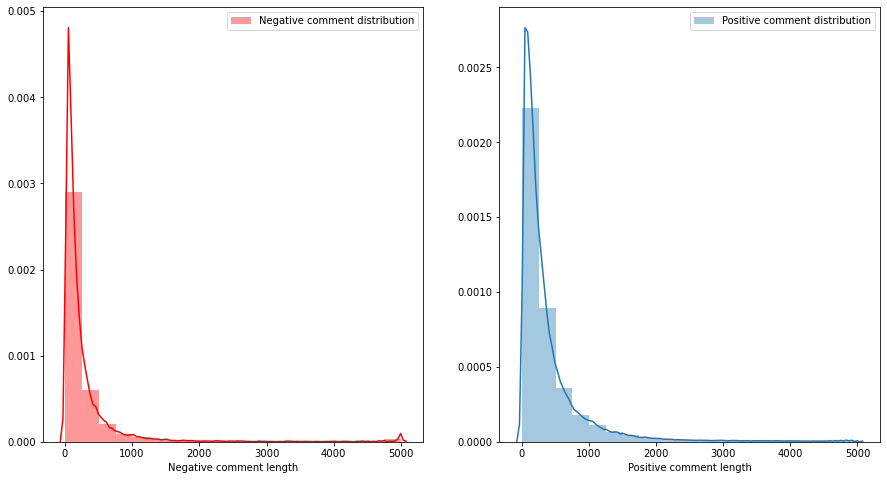

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns


# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['Positive_negative_statement']==1]['length'],bins=20,ax=ax[0],label='Negative comment distribution',color='r')

ax[0].set_xlabel('Negative comment length')
ax[0].legend()

sns.distplot(train[train['Positive_negative_statement']==0]['length'],bins=20,ax=ax[1],label='Positive comment distribution')
ax[1].set_xlabel('Positive comment length')
ax[1].legend()

plt.show()

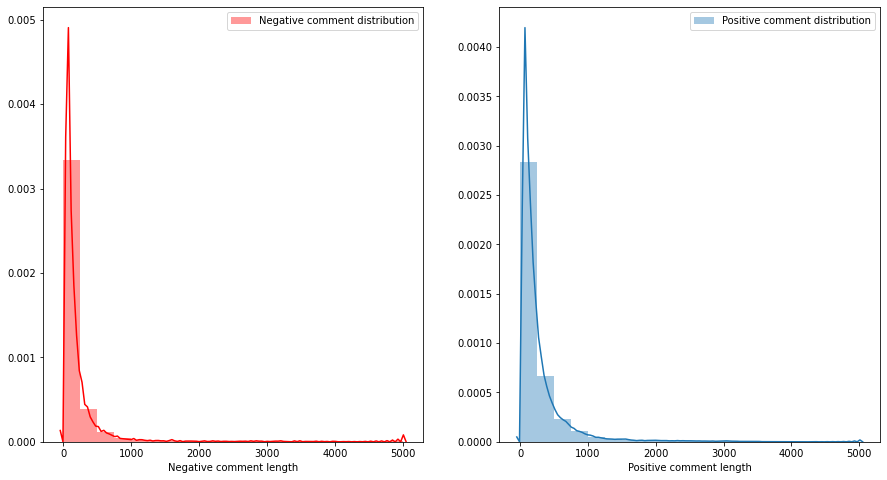

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns


# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['Positive_negative_statement']==1]['clean_length'],bins=20,ax=ax[0],label='Negative comment distribution',color='r')

ax[0].set_xlabel('Negative comment length')
ax[0].legend()

sns.distplot(train[train['Positive_negative_statement']==0]['clean_length'],bins=20,ax=ax[1],label='Positive comment distribution')
ax[1].set_xlabel('Positive comment length')
ax[1].legend()

plt.show()

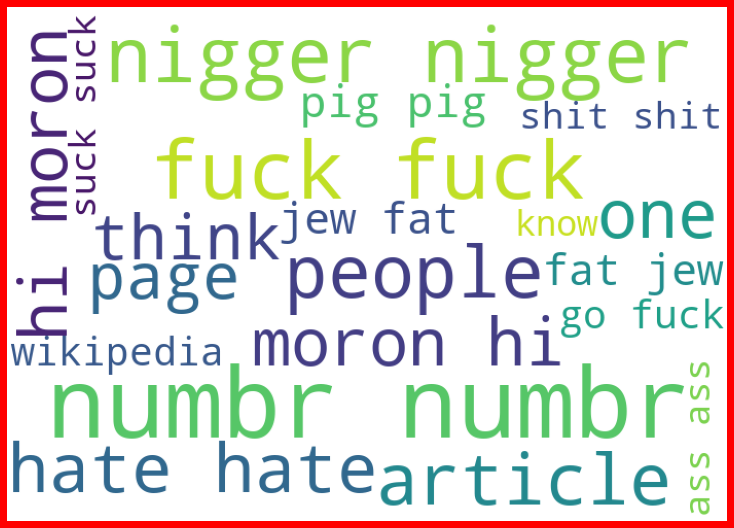

In [19]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


Negative = train['comment_text'][train['Positive_negative_statement']==1]

negative_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Negative))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(negative_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

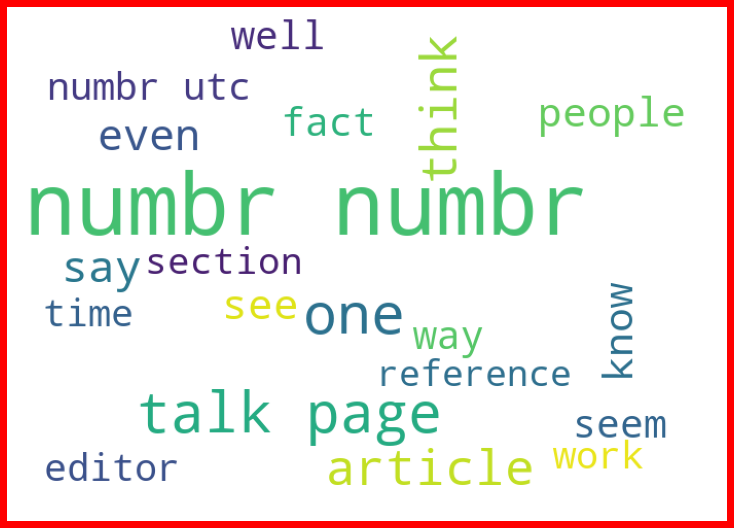

In [20]:
Positive = train['comment_text'][train['Positive_negative_statement']==0]

Positive_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Positive))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Positive_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer   
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import log_loss

tf_vec = TfidfVectorizer()

model = [MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier()]

features = tf_vec.fit_transform(train['comment_text'])

X = features
y = train['Positive_negative_statement']

# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of MultinomialNB() is:
0.9178552628280651
[[35822    12]
 [ 3265   794]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     35834
           1       0.99      0.20      0.33      4059

    accuracy                           0.92     39893
   macro avg       0.95      0.60      0.64     39893
weighted avg       0.92      0.92      0.89     39893



Accuracy score of DecisionTreeClassifier() is:
0.9449276815481413
[[34801  1033]
 [ 1164  2895]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35834
           1       0.74      0.71      0.72      4059

    accuracy                           0.94     39893
   macro avg       0.85      0.84      0.85     39893
weighted avg       0.94      0.94      0.94     39893



Accuracy score of KNeighborsClassifier() is:
0.8892788208457624
[[34776  1058]
 [ 3359   700]]
              precision    recall  f1-score   support

       

In [22]:
from sklearn.svm import SVC
SVC=SVC()
SVC.fit(X_train,Y_train)
SVC_pred=SVC.predict(x_test)
print(accuracy_score(y_test,SVC_pred))
print(confusion_matrix(y_test,SVC_pred))
print(classification_report(y_test,SVC_pred))

0.9569348005915825
[[35688   146]
 [ 1572  2487]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     35834
           1       0.94      0.61      0.74      4059

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [23]:
# Saving the SVC model as it works better than all other algorithm
import joblib   
joblib.dump(SVC,'Malignant Comments Classifier Project.pkl')

['Malignant Comments Classifier Project.pkl']

In [24]:
test=pd.read_csv('Malignent test.csv')

In [25]:
test

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [26]:
# Convert all comment_text to lower case
test['comment_text'] = test['comment_text'].str.lower()
test

id                                       comment_text
0       00001cee341fdb12  yo bitch ja rule is more succesful then you'll...
1       0000247867823ef7  == from rfc == \n\n the title is fine as it is...
2       00013b17ad220c46  " \n\n == sources == \n\n * zawe ashton on lap...
3       00017563c3f7919a  :if you have a look back at the source, the in...
4       00017695ad8997eb          i don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == okinotorishima categories == \n\n i ...
153162  fffe8f1340a79fc2  " \n\n == ""one of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::stop already. your bullshit is not wel...

[153164 rows x 2 columns]

In [27]:
# Replace email addresses with 'email'
test['comment_text'] = test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
test['comment_text'] = test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
test['comment_text'] = test['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test['comment_text'] = test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
test['comment_text'] = test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [28]:
# Remove punctuation
test['comment_text'] = test['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
test['comment_text'] = test['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
test['comment_text'] = test['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [29]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [30]:
test

id                                       comment_text
0       00001cee341fdb12  yo bitch ja rule succesful ever whats hating s...
1       0000247867823ef7                                 rfc title fine imo
2       00013b17ad220c46                        sources zawe ashton lapland
3       00017563c3f7919a  look back source information updated correct f...
4       00017695ad8997eb                          anonymously edit articles
...                  ...                                                ...
153159  fffcd0960ee309b5              totally agree stuff nothing long crap
153160  fffd7a9a6eb32c16  throw field home plate get faster throwing cut...
153161  fffda9e8d6fafa9e  okinotorishima categories see changes agree co...
153162  fffe8f1340a79fc2  one founding nations eu germany law return qui...
153163  ffffce3fb183ee80  stop already bullshit welcome fool think kind ...

[153164 rows x 2 columns]

In [31]:
mg_test1=pd.DataFrame(test.drop(columns=['id']))

In [32]:
mg_test1

comment_text
0       yo bitch ja rule succesful ever whats hating s...
1                                      rfc title fine imo
2                             sources zawe ashton lapland
3       look back source information updated correct f...
4                               anonymously edit articles
...                                                   ...
153159              totally agree stuff nothing long crap
153160  throw field home plate get faster throwing cut...
153161  okinotorishima categories see changes agree co...
153162  one founding nations eu germany law return qui...
153163  stop already bullshit welcome fool think kind ...

[153164 rows x 1 columns]

In [33]:
tf_vec1 = TfidfVectorizer()
features1 = tf_vec1.fit_transform(test['comment_text'])

X = features

In [34]:
SVC.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
p=SVC.predict(X)

In [36]:
p=pd.DataFrame(data=p)

In [37]:
p

0
0       0
1       0
2       0
3       0
4       0
...    ..
159566  0
159567  0
159568  0
159569  0
159570  0

[159571 rows x 1 columns]

In [38]:
p.to_csv('predict Malignant Comments dataset.csv') 

In [39]:
p[0].value_counts()

0    146130
1     13441
Name: 0, dtype: int64

In [41]:
train=pd.read_csv('maligent train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
